In [82]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')
import pandas as pd
from keras.utils.np_utils import to_categorical
data = pd.read_csv('/content/drive/My Drive/Datasets/CarPrice_Assignment.csv')
data = pd.DataFrame(data)
data.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(205, 26)

In [83]:
features = data
del features['car_ID']
del features['CarName']
le = LabelEncoder()
features['fueltype'] = features['fueltype'].astype('category').cat.codes
features['aspiration'] = features['aspiration'].astype('category').cat.codes
features['doornumber'] = features['doornumber'].astype('category').cat.codes
features['carbody'] = features['carbody'].astype('category').cat.codes
features['drivewheel'] = features['drivewheel'].astype('category').cat.codes
features['enginelocation'] = features['enginelocation'].astype('category').cat.codes
features['enginetype'] = features['enginetype'].astype('category').cat.codes
features['cylindernumber'] = features['cylindernumber'].astype('category').cat.codes
features['fuelsystem'] = features['fuelsystem'].astype('category').cat.codes

features['fueltype']= to_categorical(features['fueltype'])
features['aspiration']= to_categorical(features['aspiration'])
features['doornumber']= to_categorical(features['doornumber'])
features['carbody']= to_categorical(features['carbody'])
features['drivewheel']= to_categorical(features['drivewheel'])
features['enginelocation']= to_categorical(features['enginelocation'])
features['enginetype']= to_categorical(features['enginetype'])
features['cylindernumber']= to_categorical(features['cylindernumber'])
features['fuelsystem']= to_categorical(features['fuelsystem'])


for column in features:
  features[column].fillna(value = features[column].mean(),inplace = True)
x = (features.loc[:, features.columns != 'price'])
y = (features.loc[:, features.columns == 'price'])
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0.0,1.0,0.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,1.0,0.0,130,0.0,3.47,2.68,9.0,111,5000,21,27
1,3,0.0,1.0,0.0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,1.0,0.0,130,0.0,3.47,2.68,9.0,111,5000,21,27
2,1,0.0,1.0,0.0,0.0,0.0,1.0,94.5,171.2,65.5,52.4,2823,0.0,0.0,152,0.0,2.68,3.47,9.0,154,5000,19,26
3,2,0.0,1.0,1.0,0.0,0.0,1.0,99.8,176.6,66.2,54.3,2337,0.0,0.0,109,0.0,3.19,3.40,10.0,102,5500,24,30
4,2,0.0,1.0,1.0,0.0,1.0,1.0,99.4,176.6,66.4,54.3,2824,0.0,0.0,136,0.0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0.0,1.0,1.0,0.0,0.0,1.0,109.1,188.8,68.9,55.5,2952,0.0,0.0,141,0.0,3.78,3.15,9.5,114,5400,23,28
201,-1,0.0,0.0,1.0,0.0,0.0,1.0,109.1,188.8,68.8,55.5,3049,0.0,0.0,141,0.0,3.78,3.15,8.7,160,5300,19,25
202,-1,0.0,1.0,1.0,0.0,0.0,1.0,109.1,188.8,68.9,55.5,3012,0.0,0.0,173,0.0,3.58,2.87,8.8,134,5500,18,23
203,-1,1.0,0.0,1.0,0.0,0.0,1.0,109.1,188.8,68.9,55.5,3217,0.0,0.0,145,0.0,3.01,3.40,23.0,106,4800,26,27


In [84]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.6, random_state=0)
mean = x1_train.mean(axis = 0)
x1_train = x1_train-mean
std = x1_train.std(axis = 0)
x1_train = x1_train/std
x1_test = x1_test-mean
x1_validate = x1_validate-mean
x1_test = x1_test/std
x1_validate = x1_validate/std
print(X_train.shape,X_validate.shape,X_test.shape)

(102, 23) (41, 23) (62, 23)


In [85]:
all_scores = []
all_mae_history = []
model = Sequential()
model.add(Dense(10,activation = 'relu',input_shape = (x1_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation = 'relu'))
model.compile(optimizer = 'rmsprop',loss = 'mse' , metrics = ['mae'])
history = model.fit(x1_train,y1_train,batch_size = 32,validation_data=(x1_validate,y1_validate),epochs = 1000,verbose=2)
val_mse,val_mae = model.evaluate(x1_test,y1_test,verbose=0)
all_scores.append(val_mae)
mae_history = history.history['mae']
all_mae_history.append(mae_history)

Epoch 1/1000
4/4 - 1s - loss: 278266528.0000 - mae: 14240.3564 - val_loss: 291374080.0000 - val_mae: 14520.8096
Epoch 2/1000
4/4 - 0s - loss: 278264416.0000 - mae: 14240.2871 - val_loss: 291372128.0000 - val_mae: 14520.7549
Epoch 3/1000
4/4 - 0s - loss: 278262240.0000 - mae: 14240.2148 - val_loss: 291369792.0000 - val_mae: 14520.6826
Epoch 4/1000
4/4 - 0s - loss: 278259616.0000 - mae: 14240.1289 - val_loss: 291367584.0000 - val_mae: 14520.6143
Epoch 5/1000
4/4 - 0s - loss: 278257248.0000 - mae: 14240.0488 - val_loss: 291365344.0000 - val_mae: 14520.5430
Epoch 6/1000
4/4 - 0s - loss: 278254816.0000 - mae: 14239.9707 - val_loss: 291362624.0000 - val_mae: 14520.4570
Epoch 7/1000
4/4 - 0s - loss: 278252128.0000 - mae: 14239.8750 - val_loss: 291360032.0000 - val_mae: 14520.3721
Epoch 8/1000
4/4 - 0s - loss: 278249600.0000 - mae: 14239.7900 - val_loss: 291356928.0000 - val_mae: 14520.2695
Epoch 9/1000
4/4 - 0s - loss: 278246560.0000 - mae: 14239.6826 - val_loss: 291354112.0000 - val_mae: 145

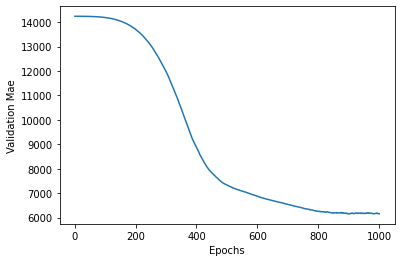

In [86]:
import numpy as np
import matplotlib.pyplot as plt
average = [np.mean([x[i] for x in all_mae_history]) for i in range(1000)]
plt.plot(range(1,len(average)+1),average)
plt.xlabel('Epochs')
plt.ylabel('Validation Mae')
plt.show()